# Description

In this project, we are required to predict whether a patient has a high or low chance of having a heart attack based on the medical information provided in detail below. The data is saved in the file `heart.csv`.

**Features**
1. Age (`Age`)
2. Gender (`Sex`)
3. Does the pain start with any specific activity? (`exang`)
  - 1 means Yes
  - 0 means No
4. Number of major vessels (`ca`)
  - Values range from 0 to 3
5. Type of chest pain (`cp`)
  - 1: Direct heart pain
  - 2: Indirect pain that leads to heart pain
  - 3: Non-heart pain
  - 4: Without symptoms
6. Resting blood pressure (`trtbps`)
7. Blood cholesterol (`chol`)
8. Fasting blood sugar - diabetes (`fbs`)
  - 1 means Yes
  - 0 means No
9. Result of rest ECG (`rest_ecg`)
  - 0: Normal
  - 1: ST segment of ECG is abnormal
  - 2: Probably or definitely enlarged left ventricle
10. Maximum heart rate achieved (`thalach`)
11. Chance of heart attack (`target`)
  - 0: Low chance
  - 1: High chance


# Data Preprocessing

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Reading the Data

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 2. Removing the Outliers

In [6]:
print("Shape before outlier remove: ", df.shape)
# trtbps: Resting blood pressure (in mm Hg)
h = 0.99
l = 0.01
q_h = df['trtbps'].quantile(h)
q_l = df['trtbps'].quantile(l)

df = df[(df['trtbps'] <= q_h) & (df['trtbps'] >= q_l)]

# chol: Cholesterol
q_h = df['chol'].quantile(h)
q_l = df['chol'].quantile(l)

df = df[(df['chol'] <= q_h) & (df['chol'] >= q_l)]

# thalachh: Maximum heart rate achieved
q_h = df['thalachh'].quantile(h)
q_l = df['thalachh'].quantile(l)

df = df[(df['thalachh'] <= q_h) & (df['thalachh'] >= q_l)]

# oldpeak
q_h = df['oldpeak'].quantile(h)
q_l = df['oldpeak'].quantile(l)

df = df[(df['oldpeak'] <= q_h) & (df['oldpeak'] >= q_l)]
print("Shape after outlier remove: ", df.shape)

Shape before outlier remove:  (303, 14)
Shape after outlier remove:  (284, 14)


In [7]:
df.shape

(284, 14)

#### Sex

In [8]:
df[['sex', 'output']].value_counts()

sex  output
1    0         107
     1          89
0    1          67
     0          21
dtype: int64

In [9]:
male = df[df['sex'] == 1]['output'].value_counts()
print('Percent of male patients: {0:0.4f}'.format(male[1]/male.sum()))

Percent of male patients: 0.4541


In [10]:
female = df[df['sex'] == 0]['output'].value_counts()
print('Percent of female patients: {0:0.4f}'.format(female[1]/female.sum()))

Percent of female patients: 0.7614


<AxesSubplot: xlabel='sex', ylabel='count'>

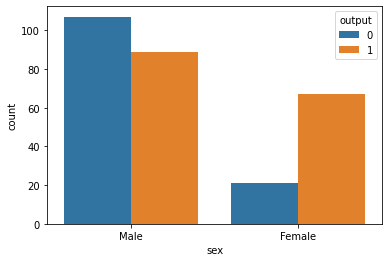

In [11]:
df_sex = df.loc[:, ['sex', 'output']]
df_sex['sex'].replace({0:'Female', 1:'Male'}, inplace=True)
sns.countplot(data=df_sex, x='sex', hue='output')

#### Age

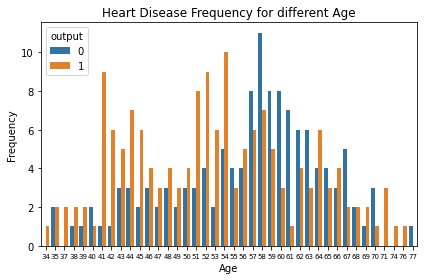

In [12]:
df_age = df.loc[:, ['age', 'output']]
ax = sns.countplot(data=df_age, x='age', hue='output')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.rcParams["figure.figsize"] = (12, 6)
plt.title('Heart Disease Frequency for different Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Chest Pain(CP)

In [13]:
df['cp'].value_counts()

0    134
2     80
1     47
3     23
Name: cp, dtype: int64

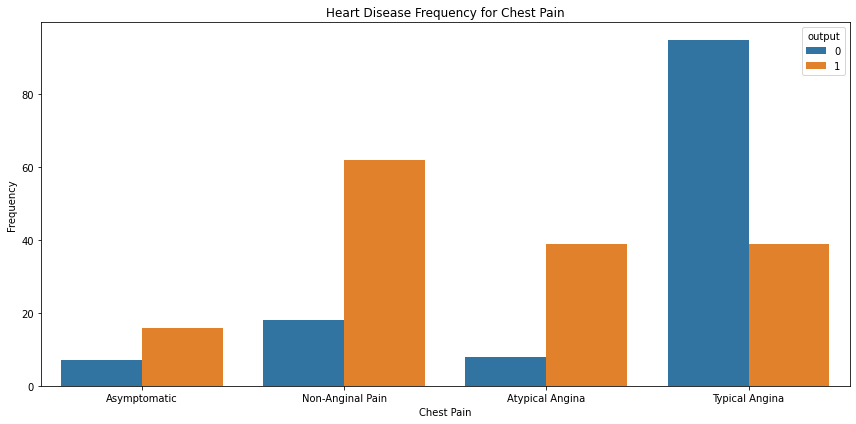

In [14]:
df_cp = df.loc[:, ['cp', 'output']]

chest_pain = {
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-Anginal Pain',
    3: 'Asymptomatic'
}

df_cp['cp'].replace(chest_pain, inplace=True)

ax = sns.countplot(data=df_cp, x='cp', hue='output')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.rcParams["figure.figsize"] = (6, 4)
plt.title('Heart Disease Frequency for Chest Pain')
plt.xlabel('Chest Pain')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Coronary Artery Anomalies

In [15]:
df['caa'].value_counts()

0    167
1     59
2     35
3     18
4      5
Name: caa, dtype: int64

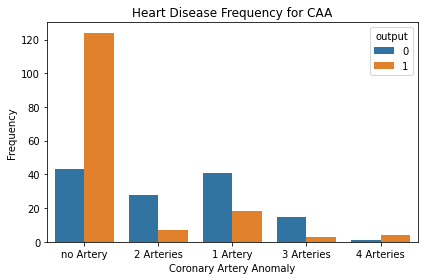

In [16]:
df_caa = df.loc[:, ['caa', 'output']]

chest_pain = {
    0: 'no Artery',
    1: '1 Artery',
    2: '2 Arteries',
    3: '3 Arteries',
    4: '4 Arteries'
}

df_caa['caa'].replace(chest_pain, inplace=True)

ax = sns.countplot(data=df_caa, x='caa', hue='output')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.rcParams["figure.figsize"] = (6, 4)
plt.title('Heart Disease Frequency for CAA')
plt.xlabel('Coronary Artery Anomaly')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Maximum Heart Rate achieved

Text(0, 0.5, 'Maximum heart rate achieved')

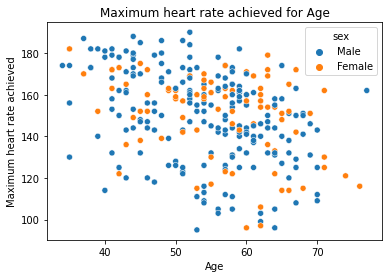

In [17]:
df_bp = df.loc[:, ['age', 'thalachh', 'sex']]
df_bp['sex'].replace({0:'Female', 1:'Male'}, inplace=True)
sns.scatterplot(data=df_bp, x='age', y='thalachh', hue='sex')
plt.title('Maximum heart rate achieved for Age')
plt.xlabel('Age')
plt.ylabel('Maximum heart rate achieved')

# Model Selection

### Normalize Features and Split Data

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# defining the features and target
X = df.drop(['output'], axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 1. Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz

accuracies = dict()

param_grid = {
    'min_samples_leaf': [1, 3],
    'max_depth': [5, 15, 25],
    'max_leaf_nodes': [10, 20, 30, 50]
}

dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)

gs.fit(X_train, y_train)

best_model = gs.best_estimator_

# save image of tree
dot_file = export_graphviz(best_model, feature_names=X.columns.values.tolist())
graph = graphviz.Source(dot_file)
graph.render(filename='tree', format='png', cleanup=True)

acc = best_model.score(X_test, y_test)
accuracies['Decision Tree'] = round(acc, 2)
print("Decision Tree Test Accuracy Score: {0:0.4f}".format(acc))

Decision Tree Test Accuracy Score: 0.7558


### 2. Random Forest

In [27]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10, 25, 50, 100, 500, 1000]
}

rf = RandomForestClassifier(random_state = 1)

gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5)

gs.fit(X_train, y_train)

best_model = gs.best_estimator_

acc = best_model.score(X_test, y_test)
accuracies['Random Forest'] = round(acc, 2)
print("Random Forest Accuracy Score: {0:0.4f}".format(acc))

Random Forest Accuracy Score: 0.8023


### 3. SVM

In [28]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

svm = SVC(random_state = 1)

gs = GridSearchCV(svm, param_grid, scoring='f1', cv=5)

gs.fit(X_train, y_train)

best_model = gs.best_estimator_
acc = best_model.score(X_test, y_test)
accuracies['SVM'] = round(acc, 2)
print("Best SVM model: ", best_model)
print("Test Accuracy of SVM: {:0.4f}".format(acc))

Best SVM model:  SVC(C=10, gamma=0.01, kernel='sigmoid', random_state=1)
Test Accuracy of SVM: 0.8140


### 4. KNN

Best KNN model:  KNeighborsClassifier(n_neighbors=27)
Test Accuracy of KNN: 0.7907


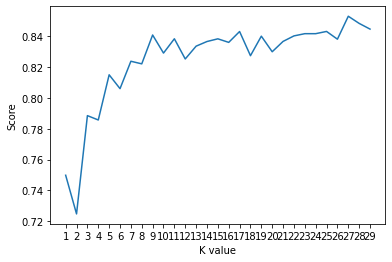

In [29]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(np.arange(1, 30, 1))
}

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, param_grid, scoring='f1', cv=5)
gs.fit(X_train, y_train)

best_model = gs.best_estimator_
acc = best_model.score(X_test, y_test)
accuracies['KNN'] = round(acc, 2)
print("Best KNN model: ", best_model)
print("Test Accuracy of KNN: {:0.4f}".format(acc))


allscores = gs.cv_results_['mean_test_score']
params = param_grid['n_neighbors']
    
plt.plot(params, allscores)
plt.xticks(np.arange(1, 30, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

### 5. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

acc = lr.score(X_test, y_test)
accuracies['Logistic Regression'] = round(acc, 2)
print("Test Accuracy of Logistic Regression: {:0.4f}".format(acc))

Test Accuracy of Logistic Regression: 0.8140


In [41]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
tp = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tn = cm[1, 1]

precision = tp/(tp + fp)
print("Precision: {0:0.4f}".format(precision))

recall = tp/(tp + fn)
print("Recall: {0:0.4f}".format(recall))

f1 = 2 * (precision * recall) / (precision + recall)
print("F1 score: {0:0.4f}".format(f1))

Precision: 0.6585
Recall: 0.9310
F1 score: 0.7714


<AxesSubplot: >

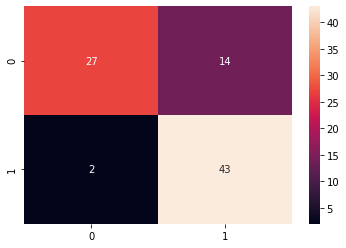

In [43]:
sns.heatmap(cm, annot=True)

In [31]:
accuracies

{'Decision Tree': 0.76,
 'Random Forest': 0.8,
 'SVM': 0.81,
 'KNN': 0.79,
 'Logistic Regression': 0.81}